In [429]:
#bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

#funções
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score




In [430]:
#arquivos csv
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv('sampleSubmission.csv')

In [431]:
#primeiras linhas do train
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [432]:
#descrição do df de treino
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [433]:
#info df treino
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


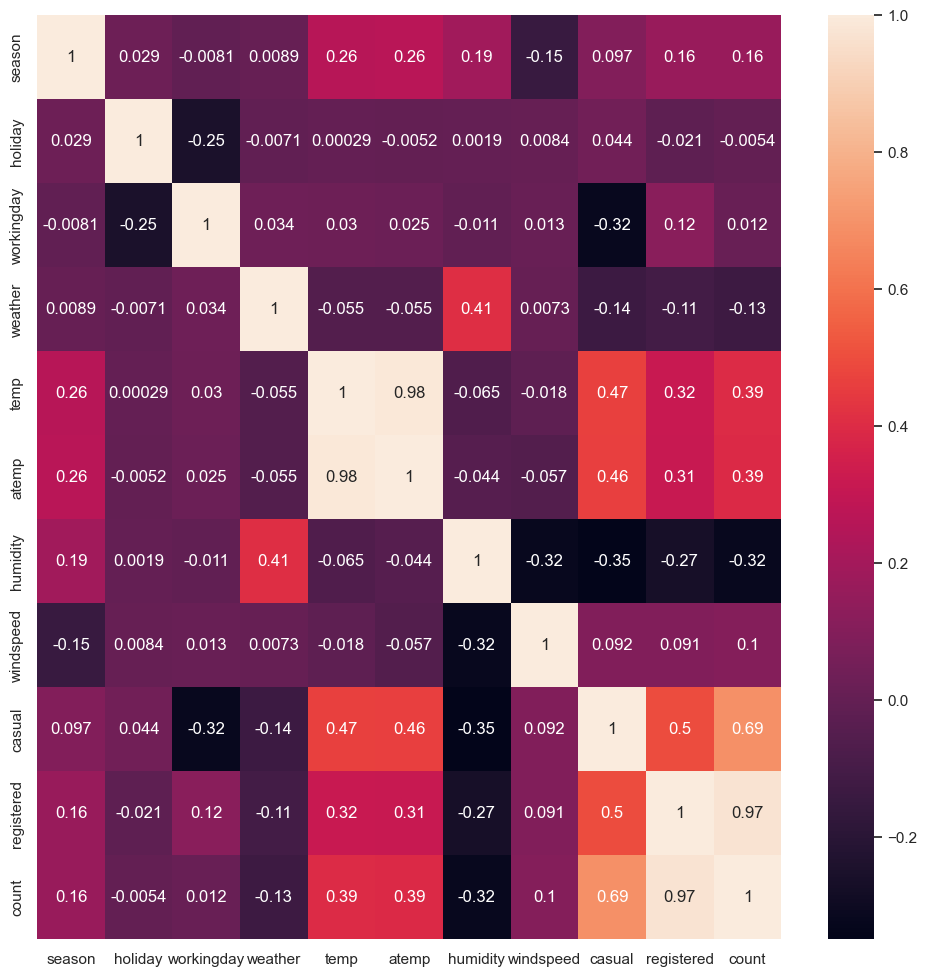

In [434]:
#ver as relações entre os dados
correlacao = train.corr()
plt.figure()
sns.heatmap(data=correlacao, annot=True)
sns.set(rc = {'figure.figsize':(12,12)})

In [435]:
#dividindo datetime
train['datetime'] = pd.to_datetime(train['datetime'])



train.insert(0, 'year', train['datetime'].dt.year)
train.insert(1, 'month', train['datetime'].dt.month)
train.insert(2, 'day', train['datetime'].dt.day)
train.insert(3, 'hour', train['datetime'].dt.hour)
train.insert(4, 'weekday', train['datetime'].dt.dayofweek)


train = train.drop(columns='datetime')



In [436]:
#excluir casual e registered
train = train.drop(columns=['casual', 'registered'])

In [437]:
train.head()

,year,month,day,hour,weekday,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011,1,1,0,5,1,0,0,1,9.84,14.395,81,0.0,16
1,2011,1,1,1,5,1,0,0,1,9.02,13.635,80,0.0,40
2,2011,1,1,2,5,1,0,0,1,9.02,13.635,80,0.0,32
3,2011,1,1,3,5,1,0,0,1,9.84,14.395,75,0.0,13
4,2011,1,1,4,5,1,0,0,1,9.84,14.395,75,0.0,1


In [438]:
test['datetime'] = pd.to_datetime(test['datetime'])



test.insert(0, 'year', test['datetime'].dt.year)
test.insert(1, 'month', test['datetime'].dt.month)
test.insert(2, 'day', test['datetime'].dt.day)
test.insert(3, 'hour', test['datetime'].dt.hour)
test.insert(4, 'weekday', test['datetime'].dt.dayofweek)


test = test.drop(columns='datetime')



In [439]:
test.head()

,year,month,day,hour,weekday,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011,1,20,0,3,1,0,1,1,10.66,11.365,56,26.0027
1,2011,1,20,1,3,1,0,1,1,10.66,13.635,56,0.0000
2,2011,1,20,2,3,1,0,1,1,10.66,13.635,56,0.0000
3,2011,1,20,3,3,1,0,1,1,10.66,12.880,56,11.0014
4,2011,1,20,4,3,1,0,1,1,10.66,12.880,56,11.0014


In [440]:
#recursos
train_features = ['year', 'month', 'day', 'hour', 'weekday', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']
#coluna de recursos é x_train
x_train = train[train_features]

In [441]:
x_train.describe()

,year,month,day,hour,weekday,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000
mean,2011.501929,6.521495,9.992559,11.541613,3.013963,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395
std,0.500019,3.444373,5.476608,6.915838,2.004585,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537
min,2011.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000
25%,2011.000000,4.000000,5.000000,6.000000,1.000000,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500
50%,2012.000000,7.000000,10.000000,12.000000,3.000000,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000
75%,2012.000000,10.000000,15.000000,18.000000,5.000000,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900
max,2012.000000,12.000000,19.000000,23.000000,6.000000,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900


In [442]:
x_train.head()

,year,month,day,hour,weekday,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011,1,1,0,5,1,0,0,1,9.84,14.395,81,0.0
1,2011,1,1,1,5,1,0,0,1,9.02,13.635,80,0.0
2,2011,1,1,2,5,1,0,0,1,9.02,13.635,80,0.0
3,2011,1,1,3,5,1,0,0,1,9.84,14.395,75,0.0
4,2011,1,1,4,5,1,0,0,1,9.84,14.395,75,0.0


In [443]:

y = train['count']

In [444]:
#Validando modelo
train_x, val_x, train_y, val_y = train_test_split(x_train, y, random_state=1)


In [445]:
#Definindo o modelo
bike_model = DecisionTreeRegressor(random_state=1)
#ajustando o modelo
bike_model.fit(train_x, train_y)

DecisionTreeRegressor(random_state=1)

In [460]:
#definindo o erro médio absoluto
val_predi = bike_model.predict(val_x)
print(int(mean_absolute_error(val_y, val_predi)))

33


In [447]:
#testando o tamanho de arvore mais preciso
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_x, val_x, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  95
Max leaf nodes: 50  		 Mean Absolute Error:  53
Max leaf nodes: 500  		 Mean Absolute Error:  32
Max leaf nodes: 5000  		 Mean Absolute Error:  33


In [448]:
#função para testar o número de folhas mais preciso
def get_mae(max_leaf_nodes, train_x, val_x, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(train_x, train_y)
    preds_val = model.predict(val_x)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [449]:
#Guardando o valor de folhas mais precisos numa variavel
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
scores = {leaf_size: get_mae(leaf_size, train_x, val_x, train_y, val_y) 
for leaf_size in candidate_max_leaf_nodes}

    


best_tree_size = min(scores, key=scores.get)

In [450]:
#Usando o modelo mais preciso
modelo_final = DecisionTreeRegressor(max_leaf_nodes=best_tree_size, random_state=1)
modelo_final.fit(train_x, train_y)


DecisionTreeRegressor(max_leaf_nodes=500, random_state=1)

In [462]:
#predições
pr = modelo_final.predict(val_x)
pr

array([347.4375    ,   8.73762376, 615.5       , ...,  24.2265625 ,
        22.90243902,   6.59943182])

In [459]:
#Testando a precisão
r2 = r2_score(val_y, pr)
prec = r2 * 100
print('precisão =', int(prec),'%')

precisão= 91 %


In [ ]:
#Aplicando o modelo com os dados de teste
#Criando um novo df com os valores da predição
tp = modelo_final.predict(test)
tp = pd.DataFrame(tp, columns=['count'])

In [ ]:
#juntando a coluna de predições com o df de teste
test = test.join(tp)
test['count'] = test['count'].astype(int)
test.head()

,year,month,day,hour,weekday,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011,1,20,0,3,1,0,1,1,10.66,11.365,56,26.0027,22
1,2011,1,20,1,3,1,0,1,1,10.66,13.635,56,0.0000,17
2,2011,1,20,2,3,1,0,1,1,10.66,13.635,56,0.0000,6
3,2011,1,20,3,3,1,0,1,1,10.66,12.880,56,11.0014,6
4,2011,1,20,4,3,1,0,1,1,10.66,12.880,56,11.0014,6
